# signature

In [1]:
import seaborn as sns
import pandas as pd
from function_repo import predict_similarity, display_signature_comparison, classify_similarity_label, classify_similarity, model_init 
from function_repo import contrastive_loss, create_base_network, euclidean_distance, show_performance

In [2]:
model = model_init()

2024-09-22 23:07:58.907181: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-09-22 23:07:58.907213: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-09-22 23:07:58.907218: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-09-22 23:07:58.907587: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-22 23:07:58.907914: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2024-09-22 23:08:00.913608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


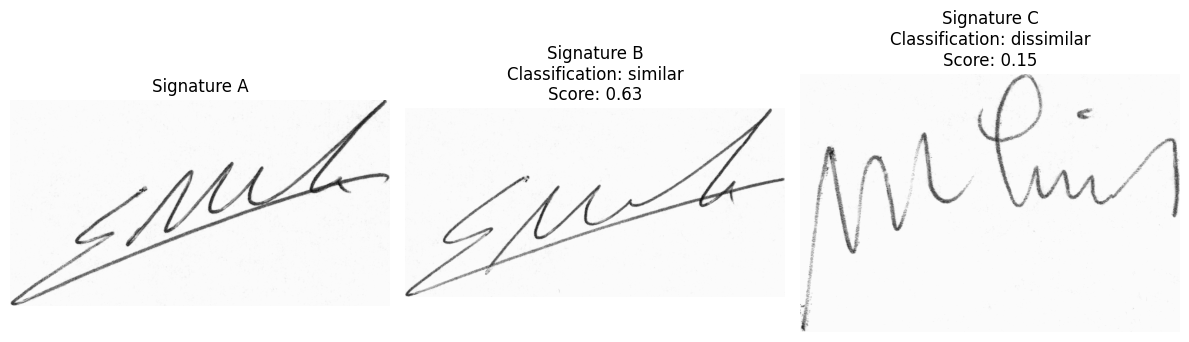

In [3]:
img1 =   "./data/validation_signature/018/01_018.png"
img1_1 = "./data/validation_signature/018/02_018.png"
img2 =   "./data/validation_signature/019/01_019.png"

display_signature_comparison(img1, img1_1, img2, model)

## éval global

In [4]:
df = pd.read_csv('signature_pairs_validation.csv', sep=";")
sample_1 = df[df['label'] == 1].sample(n=250, random_state=0)
sample_0 = df[df['label'] == 0].sample(n=250, random_state=0)
df = pd.concat([sample_1, sample_0])

In [5]:
df['score'] = df.apply(lambda row: predict_similarity(row['image_1'], row['image_2'], model), axis=1)
df['prediction'] = df.apply(lambda row: classify_similarity(row['score']), axis=1)
df.head()

,image_1,image_2,label,score,prediction
1269,./data/validation_signature/063/01_063.png,./data/validation_signature/063/02_063.png,1,0.751052,1
118,./data/validation_signature/023/01_023.png,./data/validation_signature/023/09_023.png,1,0.642345,1
2807,./data/validation_signature/050/06_050.png,./data/validation_signature/050/11_050.png,1,0.764906,1
2618,./data/validation_signature/061/09_061.png,./data/validation_signature/061/04_061.png,1,0.777500,1
1535,./data/validation_signature/039/12_039.png,./data/validation_signature/039/04_039.png,1,0.714257,1


In [6]:
matrice = pd.crosstab(df['label'], df['prediction'], rownames=['Classe réelle'], colnames=['Classe prédite'])
matrice

Classe prédite,0,1
Classe réelle,,
0,215,35
1,32,218


In [7]:
show_performance(matrice)

Précision (Accuracy) : 0.8660
Précision positive (Precision) : 0.8720
Rappel (Recall) : 0.8617
Score F1 : 0.8668


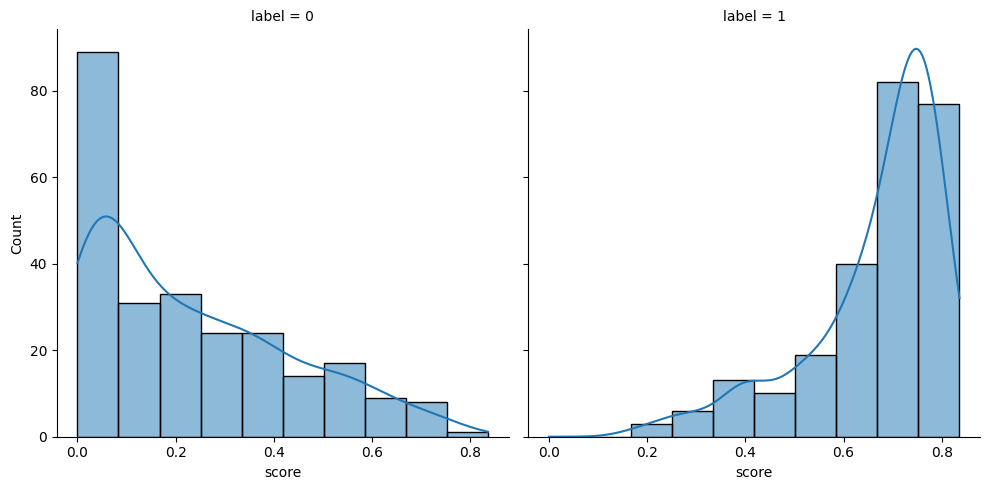

In [8]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
sns.displot(data=df, x='score', col='label', kde=True, bins=10);